In [1]:
import pandas as pd 
from sklearn.decomposition import KernelPCA 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import numpy as np
import plotly.express as px
import nbformat
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import shap
import plotly.graph_objects as go
from sklearn.metrics import roc_auc_score
import xgboost as xgb

In [2]:
data_c = pd.read_table("data/sequence_ogt_topt_features2_JF_19Jun22.tab")
data = pd.read_table("data/sequence_ogt_topt_features2_JF_19Jun22.tab")

Reduction_data = data.drop(["seq_id","seq_OGT","seq_TEMP","length"], axis = 1)
Data_Full = Reduction_data.iloc[:,0:9526]
Data_Full = Data_Full.drop(Data_Full.iloc[:,574:1126],axis = 1)

In [3]:
data

,seq_id,seq_OGT,seq_TEMP,length,A,C,D,E,F,G,...,g_distance_21,g_distance_22,g_distance_23,g_distance_24,g_distance_25,g_distance_26,g_distance_27,g_distance_28,g_distance_29,g_distance_30
0,P43408,70.0,85,192.0,0.057292,0.005208,0.067708,0.093750,0.015625,0.072917,...,0.034347,0.032415,0.032451,0.032834,0.029978,0.030860,0.031718,0.030500,0.031564,0.030533
1,Q89GR3,30.0,26,334.0,0.128743,0.023952,0.065868,0.059880,0.053892,0.068862,...,0.034243,0.032303,0.031779,0.031747,0.034163,0.031319,0.032579,0.030562,0.034217,0.031188
2,Q60352,37.0,80,260.0,0.046154,0.003846,0.080769,0.046154,0.038462,0.076923,...,0.030898,0.032849,0.032089,0.031334,0.033246,0.032201,0.031122,0.029493,0.028413,0.031119
3,Q97X08,80.0,74,334.0,0.044910,0.000000,0.020958,0.029940,0.047904,0.059880,...,0.032492,0.031342,0.031397,0.032859,0.032442,0.032565,0.032662,0.033901,0.030358,0.032277
4,Q7B8C4,37.0,30,250.0,0.048000,0.016000,0.044000,0.108000,0.044000,0.076000,...,0.031849,0.033423,0.029825,0.032686,0.031649,0.033085,0.029445,0.031416,0.030575,0.030584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,Q6RKQ1,55.0,25,498.0,0.104418,0.016064,0.048193,0.024096,0.038153,0.130522,...,0.031495,0.033294,0.032700,0.033431,0.031767,0.032473,0.031684,0.032180,0.032142,0.031725
2913,P40025,37.0,28,321.0,0.034268,0.009346,0.080997,0.077882,0.052960,0.034268,...,0.033287,0.033860,0.035131,0.032420,0.029850,0.032820,0.030632,0.031953,0.032836,0.031808
2914,P00344,27.5,54,317.0,0.107256,0.006309,0.066246,0.059937,0.044164,0.088328,...,0.034578,0.032948,0.029866,0.032200,0.032059,0.032234,0.032014,0.029896,0.030861,0.031916
2915,C0LZ63,50.0,54,579.0,0.065630,0.012090,0.077720,0.065630,0.069085,0.051813,...,0.032182,0.032999,0.033771,0.032397,0.032886,0.033406,0.031966,0.033361,0.033047,0.032657


In [4]:
data["seq_id"].value_counts()

Q5JI09    2
Q7S2S4    2
Q1JU59    2
I3RYX9    2
P9WH11    2
         ..
Q5JH57    1
A5HMI1    1
Q9F3K4    1
Q9I6J9    1
Q3ZTU7    1
Name: seq_id, Length: 2894, dtype: int64

In [3]:
input_d = Data_Full
input_d["seq_TEMP"] = data["seq_TEMP"]

In [4]:
input_d

,A,C,D,E,F,G,H,I,K,L,...,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY,seq_TEMP
0,0.057292,0.005208,0.067708,0.093750,0.015625,0.072917,0.010417,0.078125,0.093750,0.088542,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,85
1,0.128743,0.023952,0.065868,0.059880,0.053892,0.068862,0.032934,0.041916,0.017964,0.083832,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,26
2,0.046154,0.003846,0.080769,0.046154,0.038462,0.076923,0.011538,0.134615,0.107692,0.084615,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,80
3,0.044910,0.000000,0.020958,0.029940,0.047904,0.059880,0.008982,0.092814,0.026946,0.059880,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,74
4,0.048000,0.016000,0.044000,0.108000,0.044000,0.076000,0.032000,0.092000,0.056000,0.108000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,0.104418,0.016064,0.048193,0.024096,0.038153,0.130522,0.016064,0.040161,0.028112,0.054217,...,0.0,0.0,0.000000,0.000000,0.002016,0.0,0.0,0.0,0.0,25
2913,0.034268,0.009346,0.080997,0.077882,0.052960,0.034268,0.021807,0.087227,0.090343,0.105919,...,0.0,0.0,0.003135,0.000000,0.000000,0.0,0.0,0.0,0.0,28
2914,0.107256,0.006309,0.066246,0.059937,0.044164,0.088328,0.025237,0.088328,0.044164,0.072555,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,54
2915,0.065630,0.012090,0.077720,0.065630,0.069085,0.051813,0.036269,0.062176,0.065630,0.077720,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,54


In [7]:
from verstack.stratified_continuous_split import scsplit
train, test = scsplit(input_d, stratify = input_d["seq_TEMP"],test_size = 0.20,
                                             train_size = 0.80, random_state = 5)

In [77]:
train

,A,C,D,E,F,G,H,I,K,L,...,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY,seq_TEMP
1649,0.069853,0.018382,0.055147,0.077206,0.018382,0.069853,0.029412,0.099265,0.055147,0.099265,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,30
1363,0.106908,0.000000,0.042763,0.098684,0.052632,0.052632,0.024671,0.013158,0.037829,0.175987,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,71
2168,0.100977,0.022801,0.035831,0.039088,0.026059,0.091205,0.026059,0.052117,0.019544,0.055375,...,0.000000,0.0,0.003279,0.000000,0.000000,0.0,0.000000,0.000000,0.0,25
1230,0.033058,0.038567,0.068871,0.077135,0.052342,0.057851,0.019284,0.057851,0.085399,0.079890,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,28
1317,0.084974,0.001036,0.047668,0.096373,0.045596,0.080829,0.033161,0.021762,0.030052,0.148187,...,0.000000,0.0,0.001038,0.001038,0.000000,0.0,0.000000,0.001038,0.0,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,0.156627,0.012048,0.074699,0.045783,0.033735,0.089157,0.045783,0.028916,0.012048,0.106024,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,27
1859,0.053672,0.000000,0.050847,0.050847,0.031073,0.098870,0.022599,0.067797,0.079096,0.059322,...,0.002841,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,30
789,0.034146,0.029268,0.073171,0.092683,0.053659,0.053659,0.029268,0.107317,0.082927,0.097561,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,80
421,0.088325,0.007107,0.052792,0.045685,0.043655,0.077157,0.028426,0.039594,0.024365,0.086294,...,0.000000,0.0,0.000000,0.000000,0.001017,0.0,0.001017,0.000000,0.0,26


In [78]:
test

,A,C,D,E,F,G,H,I,K,L,...,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY,seq_TEMP
740,0.152695,0.011976,0.041916,0.086826,0.035928,0.098802,0.035928,0.044910,0.017964,0.116766,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,34
1858,0.138539,0.007557,0.078086,0.047859,0.030227,0.090680,0.022670,0.055416,0.042821,0.088161,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,37
2783,0.054054,0.010135,0.067568,0.084459,0.070946,0.074324,0.023649,0.064189,0.074324,0.077703,...,0.003401,0.000000,0.0,0.0,0.0,0.003401,0.0,0.0,0.0,75
2043,0.102564,0.000000,0.042735,0.102564,0.042735,0.089744,0.012821,0.038462,0.072650,0.102564,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,96
1925,0.116711,0.015915,0.053050,0.061008,0.045093,0.103448,0.034483,0.039788,0.018568,0.122016,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,0.075472,0.000000,0.037736,0.075472,0.012579,0.119497,0.037736,0.088050,0.044025,0.113208,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,25
2824,0.082090,0.007463,0.067164,0.097015,0.037313,0.059701,0.037313,0.067164,0.074627,0.082090,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,74
1012,0.079929,0.001776,0.049734,0.056838,0.042629,0.074600,0.021314,0.067496,0.069272,0.113677,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,28
612,0.019164,0.015679,0.054007,0.073171,0.052265,0.029617,0.020906,0.106272,0.120209,0.102787,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,37


In [79]:
X_train = train.drop(columns = ["seq_TEMP"], axis = 1)
y_train = train["seq_TEMP"]
X_test = test.drop(columns = ["seq_TEMP"], axis = 1)
y_test = test["seq_TEMP"]

In [83]:
from reg_resampler import resampler
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.over_sampling import SVMSMOTE
rs = resampler()
X_train["target"] = y_train
Y_classes = rs.fit(X_train, target="target", bins= 100)
Y =  y_train
smote = SVMSMOTE(random_state=27)
final_X, final_Y = rs.resample(smote, X_train, Y_classes)
X_train_R = X_train.drop(columns=["target"], axis = 1)

INFO: Class 0 has been merged into Class 71 due to low number of samples
INFO: Class 1 has been merged into Class 71 due to low number of samples
INFO: Class 2 has been merged into Class 71 due to low number of samples
INFO: Class 3 has been merged into Class 71 due to low number of samples
INFO: Class 4 has been merged into Class 71 due to low number of samples
INFO: Class 5 has been merged into Class 71 due to low number of samples
INFO: Class 6 has been merged into Class 71 due to low number of samples
INFO: Class 7 has been merged into Class 71 due to low number of samples
INFO: Class 8 has been merged into Class 71 due to low number of samples
INFO: Class 27 has been merged into Class 26 due to low number of samples
INFO: Class 28 has been merged into Class 26 due to low number of samples
INFO: Class 31 has been merged into Class 30 due to low number of samples
INFO: Class 34 has been merged into Class 33 due to low number of samples
INFO: Class 35 has been merged into Class 33 du

In [95]:
X_test["target"] = y_test
Y_classes = rs.fit(X_test, target="target", bins= 100)
Y =  y_test
smote = SVMSMOTE(random_state=27)
final_X_t, final_Y_t = rs.resample(smote, X_test, Y_classes)
X_test_R = X_test.drop(columns=["target"], axis = 1)

INFO: Class 0 has been merged into Class 59 due to low number of samples
INFO: Class 1 has been merged into Class 59 due to low number of samples
INFO: Class 2 has been merged into Class 59 due to low number of samples
INFO: Class 3 has been merged into Class 59 due to low number of samples
INFO: Class 4 has been merged into Class 59 due to low number of samples
INFO: Class 5 has been merged into Class 59 due to low number of samples
INFO: Class 6 has been merged into Class 59 due to low number of samples
INFO: Class 7 has been merged into Class 59 due to low number of samples
INFO: Class 22 has been merged into Class 21 due to low number of samples
INFO: Class 23 has been merged into Class 21 due to low number of samples
INFO: Class 24 has been merged into Class 21 due to low number of samples
INFO: Class 25 has been merged into Class 21 due to low number of samples
INFO: Class 26 has been merged into Class 21 due to low number of samples
INFO: Class 27 has been merged into Class 21 d

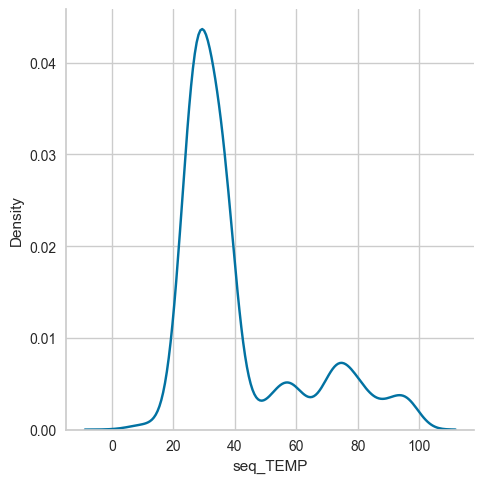

In [85]:
sns.displot(train, x="seq_TEMP", kind="kde")

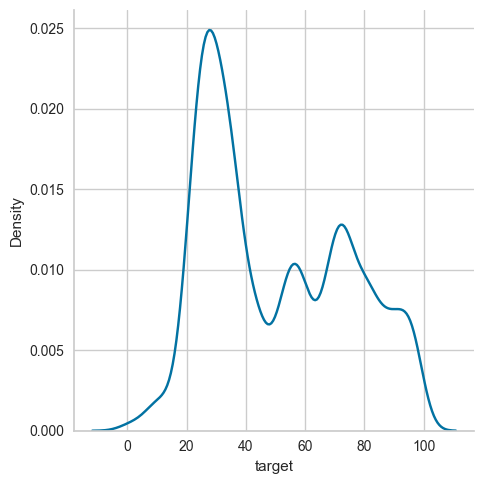

In [94]:
sns.displot(final_Y, kind="kde")

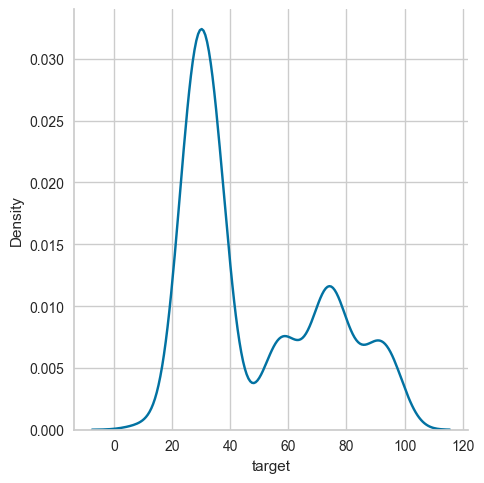

In [96]:
sns.displot(final_Y_t, kind="kde")

In [ ]:
X_train = train.drop(columns = ["seq_TEMP"], axis = 1)
y_train = train["seq_TEMP"]
X_test = test.drop(columns = ["seq_TEMP"], axis = 1)
y_test = test["seq_TEMP"]

In [ ]:
from reg_resampler import resampler
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.over_sampling import SVMSMOTE
rs = resampler()
X_train["target"] = y_train
Y_classes = rs.fit(X_train, target="target", bins= 100)
Y =  y_train
smote = SVMSMOTE(random_state=27)
final_X, final_Y = rs.resample(smote, X_train, Y_classes)
X_train_R = X_train.drop(columns=["target"], axis = 1)

In [97]:
final_X_t

,A,C,D,E,F,G,H,I,K,L,...,YYM,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY
0,0.152695,0.011976,0.041916,0.086826,0.035928,0.098802,0.035928,0.044910,0.017964,0.116766,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.138539,0.007557,0.078086,0.047859,0.030227,0.090680,0.022670,0.055416,0.042821,0.088161,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.054054,0.010135,0.067568,0.084459,0.070946,0.074324,0.023649,0.064189,0.074324,0.077703,...,0.0,0.003401,0.0,0.000000,0.0,0.000000,0.003401,0.0,0.0,0.0
3,0.102564,0.000000,0.042735,0.102564,0.042735,0.089744,0.012821,0.038462,0.072650,0.102564,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.116711,0.015915,0.053050,0.061008,0.045093,0.103448,0.034483,0.039788,0.018568,0.122016,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,0.092304,0.014759,0.061816,0.070264,0.043901,0.082495,0.026584,0.050184,0.049600,0.072629,...,0.0,0.000000,0.0,0.000593,0.0,0.000000,0.000000,0.0,0.0,0.0
1487,0.091814,0.003105,0.036509,0.116350,0.039144,0.063114,0.011997,0.078216,0.074618,0.090755,...,0.0,0.002627,0.0,0.000000,0.0,0.002627,0.000000,0.0,0.0,0.0
1488,0.086167,0.003382,0.051332,0.088113,0.039037,0.065679,0.019059,0.091905,0.085757,0.062708,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
1489,0.082528,0.005432,0.066074,0.074301,0.036019,0.090125,0.027634,0.083847,0.069557,0.084378,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0


In [105]:
model = xgb.XGBRegressor(
                         num_parallel_tree = 10,
                         max_depth = 8,
                         n_estimators=5000,
                         learning_rate = 0.1,
                         verbosity = 1,
                         booster = 'gbtree',
                         tree_method = 'auto',
                         n_jobs = -1,
                         sampling_method ='uniform',
                         subsample = 0.1,
                         colsample_bytree = 0.5,
                         objective ='reg:squarederror',
                         gamma = 1,
                         reg_alpha = 1,
                         reg_lambda =1,
                         eval_metric = ["rmse"],
                         max_bin = 50,
                         min_child_weight = 10,
                         max_leaves =0,
                         grow_policy = 'lossguide'
                        )

model.fit(final_X,final_Y,eval_set=[(final_X,final_Y),(final_X_t,final_Y_t)],early_stopping_rounds=10)

[0]	validation_0-rmse:50.25686	validation_1-rmse:48.51762
[1]	validation_0-rmse:45.65678	validation_1-rmse:44.04973
[2]	validation_0-rmse:41.50797	validation_1-rmse:40.04696
[3]	validation_0-rmse:37.80054	validation_1-rmse:36.54607
[4]	validation_0-rmse:34.45828	validation_1-rmse:33.41257
[5]	validation_0-rmse:31.44840	validation_1-rmse:30.64217
[6]	validation_0-rmse:28.75387	validation_1-rmse:28.20787
[7]	validation_0-rmse:26.31591	validation_1-rmse:26.01828
[8]	validation_0-rmse:24.14911	validation_1-rmse:24.11367
[9]	validation_0-rmse:22.20384	validation_1-rmse:22.39892
[10]	validation_0-rmse:20.42514	validation_1-rmse:20.89360
[11]	validation_0-rmse:18.84769	validation_1-rmse:19.57424
[12]	validation_0-rmse:17.45023	validation_1-rmse:18.44819
[13]	validation_0-rmse:16.18812	validation_1-rmse:17.46370
[14]	validation_0-rmse:15.06850	validation_1-rmse:16.62763
[15]	validation_0-rmse:14.07758	validation_1-rmse:15.88983
[16]	validation_0-rmse:13.19161	validation_1-rmse:15.25776
[17]	va

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=['rmse'], feature_types=None, gamma=1, gpu_id=-1,
             grow_policy='lossguide', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=50,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=8, max_leaves=0, min_child_weight=10, missing=nan,
             monotone_constraints='()', n_estimators=5000, n_jobs=-1,
             num_parallel_tree=10, predictor='auto', random_state=0, ...)

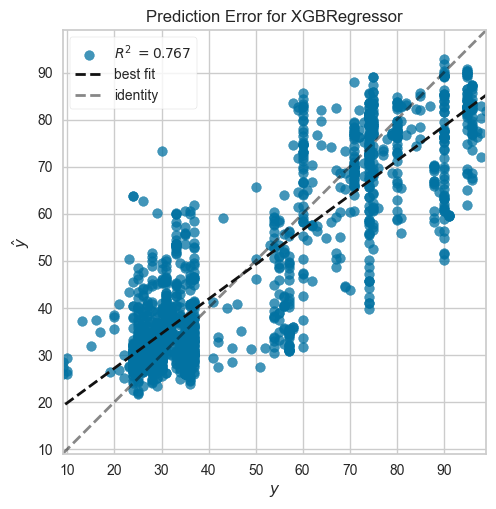

In [106]:
from yellowbrick.regressor import prediction_error
visualizer = prediction_error(model, final_X,final_Y, final_X_t,final_Y_t)

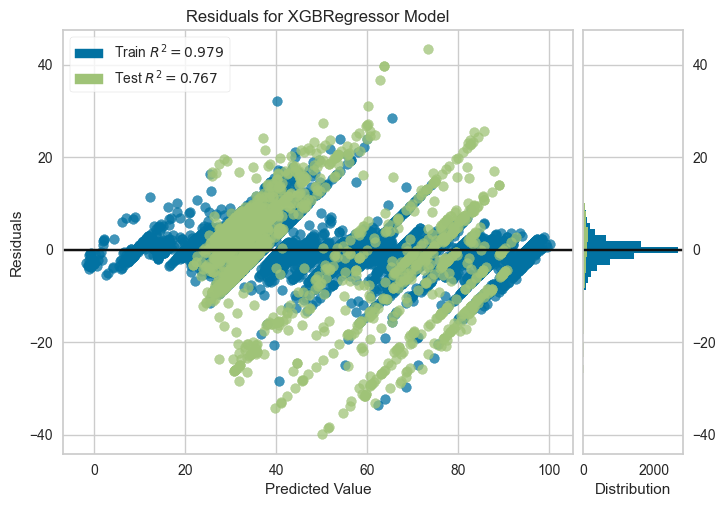

<AxesSubplot: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [107]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model)

visualizer.fit(final_X,final_Y)  # Fit the training data to the visualizer
visualizer.score(final_X_t,final_Y_t)  # Evaluate the model on the test data
visualizer.show()    

In [112]:
r2_metric = []

from imblearn.over_sampling import SMOTE
for i in range(10):
    train, test = scsplit(input_d, stratify = input_d["seq_TEMP"],test_size = 0.2,
                                             train_size = 0.8, random_state = i)
    
    X_train = train.drop(columns = ["seq_TEMP"], axis = 1)
    y_train = train["seq_TEMP"]
    X_test = test.drop(columns = ["seq_TEMP"], axis = 1)
    y_test = test["seq_TEMP"]
    
    rs = resampler()
    X_train["target"] = y_train
    Y_classes = rs.fit(X_train, target="target", bins= 100)
    Y =  y_train
    smote = SMOTE(random_state=27)
    final_X, final_Y = rs.resample(smote, X_train, Y_classes)
    X_train_R = X_train.drop(columns=["target"], axis = 1)

    X_test["target"] = y_test
    Y_classes = rs.fit(X_test, target="target", bins= 100)
    Y =  y_test
    smote = SMOTE(random_state=27)
    final_X_t, final_Y_t = rs.resample(smote, X_test, Y_classes)
    X_test_R = X_test.drop(columns=["target"], axis = 1)
    
    model = xgb.XGBRegressor(
                         num_parallel_tree = 10,
                         max_depth = 8,
                         n_estimators=5000,
                         learning_rate = 0.1,
                         verbosity = 1,
                         booster = 'gbtree',
                         tree_method = 'auto',
                         n_jobs = -1,
                         sampling_method ='uniform',
                         subsample = 0.1,
                         colsample_bytree = 0.5,
                         objective ='reg:squarederror',
                         gamma = 1,
                         reg_alpha = 1,
                         reg_lambda =1,
                         eval_metric = ["rmse"],
                         max_bin = 50,
                         min_child_weight = 10,
                         max_leaves =0,
                         grow_policy = 'lossguide'
                        )

    model.fit(final_X,final_Y,eval_set=[(final_X,final_Y),(final_X_t,final_Y_t)],early_stopping_rounds=10)

    r2_scr = r2_score(final_Y_t,model.predict(final_X_t)) 
    r2_metric.append(r2_scr)

INFO: Class 0 has been merged into Class 71 due to low number of samples
INFO: Class 1 has been merged into Class 71 due to low number of samples
INFO: Class 2 has been merged into Class 71 due to low number of samples
INFO: Class 3 has been merged into Class 71 due to low number of samples
INFO: Class 4 has been merged into Class 71 due to low number of samples
INFO: Class 5 has been merged into Class 71 due to low number of samples
INFO: Class 6 has been merged into Class 71 due to low number of samples
INFO: Class 7 has been merged into Class 71 due to low number of samples
INFO: Class 26 has been merged into Class 25 due to low number of samples
INFO: Class 27 has been merged into Class 25 due to low number of samples
INFO: Class 30 has been merged into Class 29 due to low number of samples
INFO: Class 33 has been merged into Class 32 due to low number of samples
INFO: Class 34 has been merged into Class 32 due to low number of samples
INFO: Class 35 has been merged into Class 32 d

In [8]:
from reg_resampler import resampler
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.over_sampling import SMOTE
from verstack.stratified_continuous_split import scsplit

In [28]:
r2_metric = []
from verstack.stratified_continuous_split import scsplit
from imblearn.over_sampling import SMOTE
for i in range(1):
    train, test = scsplit(input_d, stratify = input_d["seq_TEMP"],test_size = 0.2,
                                             train_size = 0.8, random_state = 6)
    
    X_train = train.drop(columns = ["seq_TEMP"], axis = 1)
    y_train = train["seq_TEMP"]
    X_test = test.drop(columns = ["seq_TEMP"], axis = 1)
    y_test = test["seq_TEMP"]
    
    rs = resampler()
    X_train["target"] = y_train
    Y_classes = rs.fit(X_train, target="target", bins= 100)
    Y =  y_train
    smote = SMOTE(random_state=27)
    final_X, final_Y = rs.resample(smote, X_train, Y_classes)
    X_train_R = X_train.drop(columns=["target"], axis = 1)

    X_test["target"] = y_test
    Y_classes = rs.fit(X_test, target="target", bins= 100)
    Y =  y_test
    smote = SMOTE(random_state=27)
    final_X_t, final_Y_t = rs.resample(smote, X_test, Y_classes)
    X_test_R = X_test.drop(columns=["target"], axis = 1)
    
    model = xgb.XGBRegressor(
                         num_parallel_tree = 10,
                         max_depth = 8,
                         n_estimators=5000,
                         learning_rate = 0.1,
                         verbosity = 1,
                         booster = 'gbtree',
                         tree_method = 'auto',
                         n_jobs = -1,
                         sampling_method ='uniform',
                         subsample = 0.1,
                         colsample_bytree = 0.5,
                         objective ='reg:squarederror',
                         gamma = 1,
                         reg_alpha = 1,
                         reg_lambda =1,
                         eval_metric = ["rmse"],
                         max_bin = 50,
                         min_child_weight = 10,
                         max_leaves =0,
                         grow_policy = 'lossguide'
                        )

    model.fit(final_X,final_Y,eval_set=[(final_X,final_Y),(final_X_t,final_Y_t)],early_stopping_rounds=10)

    r2_scr = r2_score(final_Y_t,model.predict(final_X_t)) 
    r2_metric.append(r2_scr)

INFO: Class 0 has been merged into Class 71 due to low number of samples
INFO: Class 1 has been merged into Class 71 due to low number of samples
INFO: Class 2 has been merged into Class 71 due to low number of samples
INFO: Class 3 has been merged into Class 71 due to low number of samples
INFO: Class 4 has been merged into Class 71 due to low number of samples
INFO: Class 5 has been merged into Class 71 due to low number of samples
INFO: Class 6 has been merged into Class 71 due to low number of samples
INFO: Class 7 has been merged into Class 71 due to low number of samples
INFO: Class 26 has been merged into Class 25 due to low number of samples
INFO: Class 27 has been merged into Class 25 due to low number of samples
INFO: Class 30 has been merged into Class 29 due to low number of samples
INFO: Class 33 has been merged into Class 32 due to low number of samples
INFO: Class 34 has been merged into Class 32 due to low number of samples
INFO: Class 35 has been merged into Class 32 d

In [20]:
5 != 6

True

In [22]:
x = {1,2,3,4,5}
x.add(5)
x.add(6)
x

{1, 2, 3, 4, 5, 6}

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

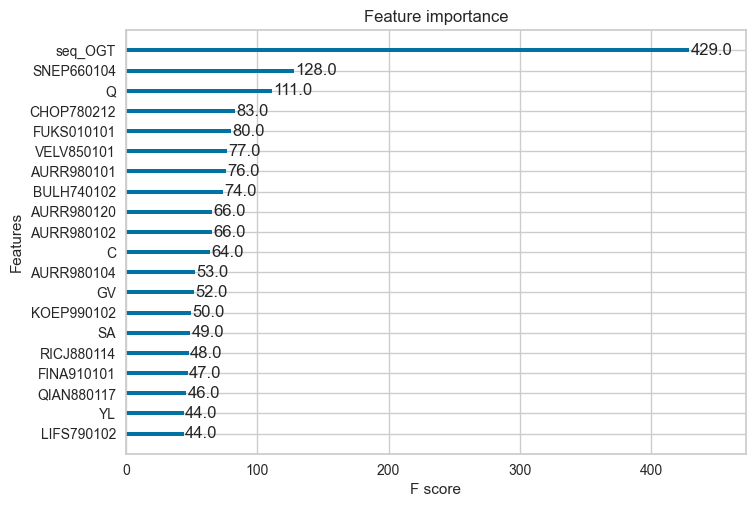

In [11]:
xgb.plot_importance(model, max_num_features = 20)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

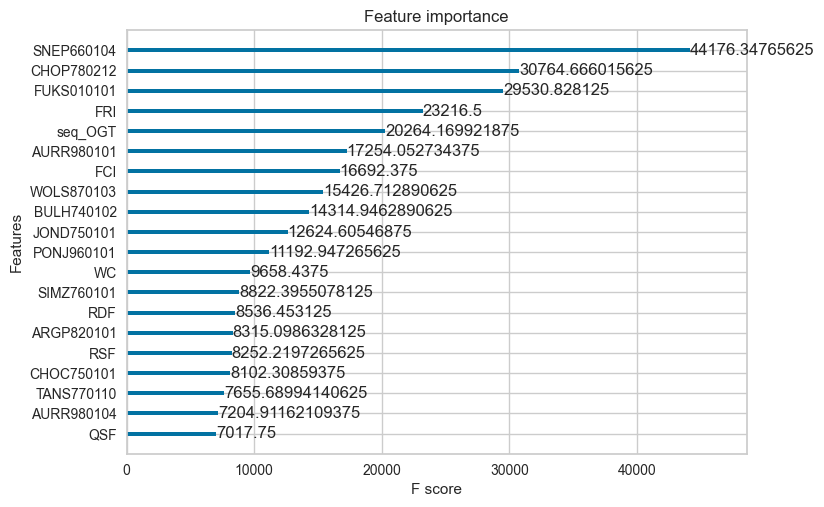

In [12]:
xgb.plot_importance(model, max_num_features = 20, importance_type = "gain")

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

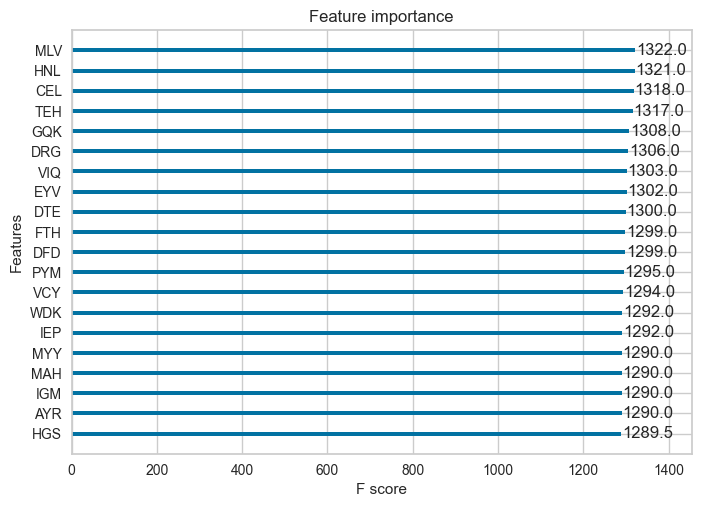

In [13]:
xgb.plot_importance(model, max_num_features = 20,importance_type = "cover")

In [14]:
r2_metric

[0.8392192343344346]

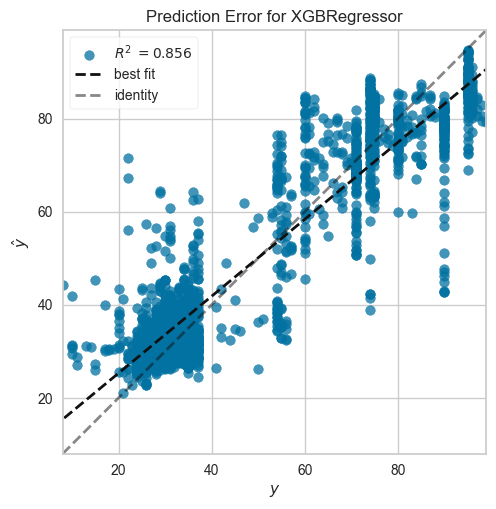

In [9]:
from yellowbrick.regressor import prediction_error
visualizer = prediction_error(model, final_X,final_Y, final_X_t,final_Y_t)

In [29]:
from sklearn.metrics import explained_variance_score
explained_variance_score(final_Y_t,model.predict(final_X_t))

0.8569113756317874

In [30]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(final_Y_t,model.predict(final_X_t))

6.60953218948438

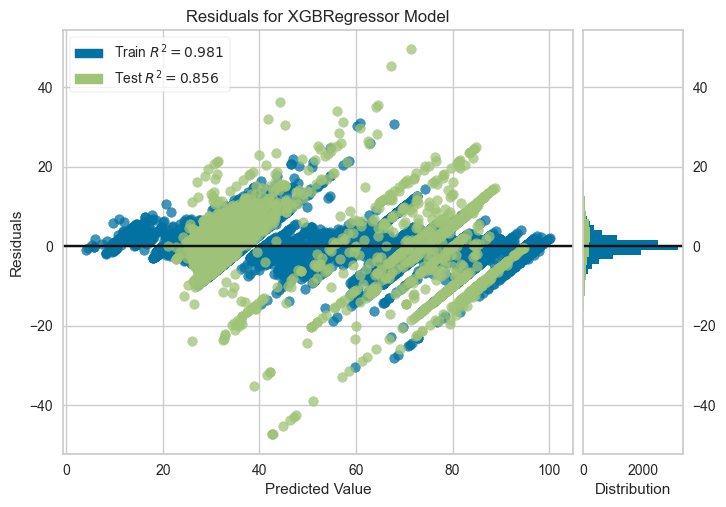

<AxesSubplot: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [10]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model)

visualizer.fit(final_X,final_Y)  # Fit the training data to the visualizer
visualizer.score(final_X_t,final_Y_t)  # Evaluate the model on the test data
visualizer.show()    

In [113]:
r2_metric

[0.8053517885662369,
 0.7912352989534119,
 0.8023432213350045,
 0.7864483396498285,
 0.7903525435136791,
 0.8201463012334445,
 0.8392192343344346,
 0.8027053506368202,
 0.8049618027735149,
 0.7887248937589713]

In [110]:
X_train

,A,C,D,E,F,G,H,I,K,L,...,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY,target
1787,0.087576,0.002037,0.054990,0.071283,0.048880,0.081466,0.020367,0.067210,0.057026,0.063136,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,90
797,0.086598,0.014433,0.059794,0.078351,0.028866,0.084536,0.026804,0.080412,0.032990,0.094845,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,37
844,0.131295,0.017986,0.048561,0.070144,0.026978,0.082734,0.021583,0.062950,0.028777,0.080935,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,26
1116,0.106977,0.013953,0.061628,0.074419,0.046512,0.063953,0.020930,0.041860,0.065116,0.082558,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,35
658,0.064935,0.012987,0.064935,0.051948,0.019481,0.149351,0.058442,0.051948,0.051948,0.032468,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,0.115764,0.007389,0.056650,0.088670,0.043103,0.071429,0.012315,0.045567,0.035714,0.112069,...,0.0,0.0,0.0,0.0,0.0,0.001235,0.0,0.0,0.000000,28
2293,0.080292,0.004866,0.036496,0.026764,0.034063,0.136253,0.017032,0.046229,0.017032,0.038929,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,52
396,0.076023,0.026316,0.064327,0.052632,0.043860,0.064327,0.043860,0.067251,0.049708,0.087719,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,29
527,0.093069,0.009901,0.061386,0.063366,0.042574,0.061386,0.019802,0.055446,0.057426,0.081188,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,23


In [118]:
from yellowbrick.model_selection import ValidationCurve
viz = ValidationCurve( model, param_name="max_depth",
    param_range=np.arange(5, 10), cv=2, scoring="r2"
)

# Fit and show the visualizer
viz.fit(final_X,final_Y)
viz.show()

In [14]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(final_X)

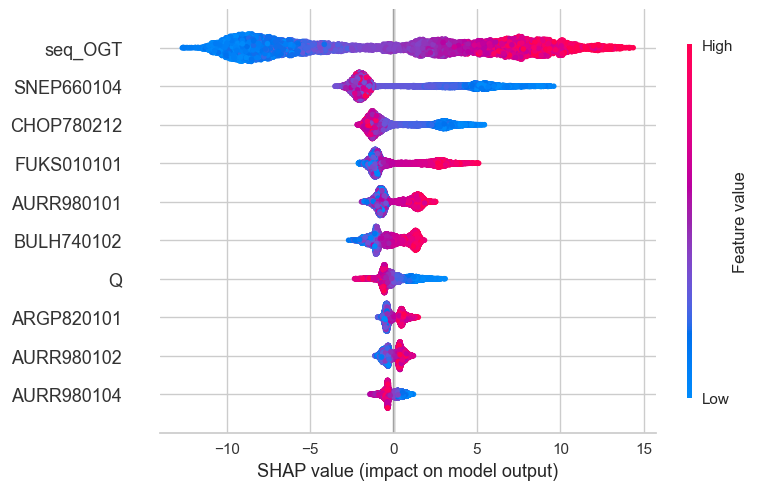

In [16]:
shap.summary_plot(shap_values, final_X, max_display = 10)

In [32]:
input_d = input_d.drop("seq_OGT", axis = 1)

In [6]:
def temp_range_to_class(value):
    if value <= 20:
        return "very low"
    elif value <= 40 and value > 20:
        return "low"
    elif value <= 60 and value > 40:
        return "moderate"
    elif value <= 80 and value > 60:
        return "high"
    elif value <= 100 and value > 80:
        return "very high"
    
def temp_range_to_no(value):
    if value <= 20:
        return 0
    elif value <= 40 and value > 20:
        return 1
    elif value <= 60 and value > 40:
        return 2
    elif value <= 80 and value > 60:
        return 3
    elif value <= 100 and value > 80:
        return 4

input_d["range"] = input_d["seq_TEMP"].apply(temp_range_to_class)
input_d["range"] = input_d["seq_TEMP"].apply(temp_range_to_no)

In [35]:
train, test = scsplit(input_d, stratify = input_d["range"],test_size = 0.2,
                                             train_size = 0.8, random_state = 6)
    
X_train = train.drop(columns = ["seq_TEMP","range"], axis = 1)
y_train = train["range"]
    
X_validation = test.drop(columns = ["seq_TEMP","range"], axis = 1)
y_validation = test["range"]
    
    
X, y = X_train, y_train
y = LabelEncoder().fit_transform(y)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

data_model = pd.DataFrame(X)
data_model["range"] = y

data_val = pd.DataFrame(X_validation)
data_val["range"] = y_validation

In [36]:
data_model

,A,C,D,E,F,G,H,I,K,L,...,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY,range
0,0.060811,0.003378,0.070946,0.081081,0.006757,0.104730,0.033784,0.077703,0.070946,0.114865,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
1,0.035156,0.003906,0.046875,0.085938,0.046875,0.050781,0.019531,0.109375,0.093750,0.082031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
2,0.098101,0.006329,0.063291,0.060127,0.037975,0.094937,0.012658,0.085443,0.063291,0.066456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
3,0.048000,0.016000,0.044000,0.108000,0.044000,0.076000,0.032000,0.092000,0.056000,0.108000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
4,0.108614,0.005618,0.043071,0.082397,0.013109,0.065543,0.007491,0.104869,0.091760,0.099251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8510,0.118787,0.000137,0.038916,0.101991,0.042461,0.081651,0.005599,0.091616,0.096393,0.086291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4
8511,0.055686,0.004258,0.046250,0.105942,0.049227,0.077932,0.016481,0.067928,0.090210,0.077526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000533,0.0,0.0,4
8512,0.072791,0.005627,0.067560,0.078342,0.039445,0.089841,0.023073,0.083383,0.064993,0.091067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4
8513,0.047472,0.002387,0.050695,0.106509,0.051950,0.062557,0.023379,0.071957,0.084459,0.094155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4


In [37]:
data_val

,A,C,D,E,F,G,H,I,K,L,...,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY,range
2085,0.103896,0.011544,0.066378,0.075036,0.046176,0.062049,0.021645,0.049062,0.076479,0.092352,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
142,0.094077,0.015099,0.059233,0.082462,0.037166,0.066202,0.025552,0.054588,0.063879,0.073171,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
63,0.074202,0.000863,0.054357,0.072476,0.028473,0.054357,0.016393,0.041415,0.065574,0.079379,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
2258,0.074689,0.020747,0.049793,0.066390,0.070539,0.058091,0.029046,0.053942,0.070539,0.103734,...,0.0,0.000000,0.0,0.004184,0.0,0.0,0.0,0.0,0.0,1
769,0.061466,0.004728,0.054374,0.094563,0.068558,0.061466,0.023641,0.082742,0.125296,0.063830,...,0.0,0.002375,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,0.064444,0.000000,0.053333,0.100000,0.053333,0.062222,0.013333,0.093333,0.075556,0.102222,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,4
1299,0.088123,0.000000,0.049808,0.118774,0.015326,0.061303,0.019157,0.080460,0.065134,0.103448,...,0.0,0.000000,0.0,0.003861,0.0,0.0,0.0,0.0,0.0,2
2632,0.149485,0.000000,0.030928,0.030928,0.025773,0.067010,0.010309,0.092784,0.005155,0.159794,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,4
1234,0.135983,0.020921,0.060669,0.023013,0.027197,0.104603,0.014644,0.029289,0.029289,0.062762,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1


In [39]:
train, test = scsplit(input_d, stratify = input_d["range"],test_size = 0.2,
                                             train_size = 0.8, random_state = 6)
    
X_train = train.drop(columns = ["seq_TEMP","range"], axis = 1)
y_train = train["range"]
    
X_validation = test.drop(columns = ["seq_TEMP","range"], axis = 1)
y_validation = test["range"]
    
    
X, y = X_train, y_train
y = LabelEncoder().fit_transform(y)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

data_model = pd.DataFrame(X)
data_model["range"] = y

data_val = pd.DataFrame(X_validation)
data_val["range"] = y_validation

data_model_f = data_model

data_xgb = data_model_f.drop(["range"], axis = 1)
data_xgb_y = data_model_f["range"] 

data_val_f = data_val.drop(["range"], axis = 1)
data_val_end = data_val["range"]

model = xgb.XGBClassifier(
                         num_parallel_tree = 10,
                         max_depth = 8,
                         learning_rate = 0.05,
                         verbosity = 1,
                         booster = 'gbtree',
                         tree_method = 'auto',
                         eval_metric= ['auc'],
                         n_jobs = -1,
                         subsample = 0.2,
                         sampling_method ='uniform',
                         colsample_bytree = 0.1,
                         objective ='multi:softprob',
                        )
    
X_train, X_test, y_train, y_test = train_test_split(data_xgb,data_xgb_y, test_size=0.1, random_state = 42)

model.fit(X_train,y_train,eval_set=[(X_test,y_test),(data_val_f,data_val_end)],early_stopping_rounds=10)


[0]	validation_0-auc:0.98560	validation_1-auc:0.86083
[1]	validation_0-auc:0.99068	validation_1-auc:0.87154
[2]	validation_0-auc:0.99204	validation_1-auc:0.87665
[3]	validation_0-auc:0.99291	validation_1-auc:0.88117
[4]	validation_0-auc:0.99333	validation_1-auc:0.88400
[5]	validation_0-auc:0.99364	validation_1-auc:0.88342
[6]	validation_0-auc:0.99404	validation_1-auc:0.88421
[7]	validation_0-auc:0.99421	validation_1-auc:0.88570
[8]	validation_0-auc:0.99441	validation_1-auc:0.88422
[9]	validation_0-auc:0.99468	validation_1-auc:0.88561
[10]	validation_0-auc:0.99494	validation_1-auc:0.88693
[11]	validation_0-auc:0.99505	validation_1-auc:0.88804
[12]	validation_0-auc:0.99516	validation_1-auc:0.88815
[13]	validation_0-auc:0.99524	validation_1-auc:0.88733
[14]	validation_0-auc:0.99543	validation_1-auc:0.88783
[15]	validation_0-auc:0.99553	validation_1-auc:0.88859
[16]	validation_0-auc:0.99560	validation_1-auc:0.88935
[17]	validation_0-auc:0.99567	validation_1-auc:0.88975
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=['auc'], feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=10, objective='multi:softprob',
              predictor='auto', ...)

In [9]:
auc_metric = []
r2_metric  = []
for i in range(1):
    train, test = scsplit(input_d, stratify = input_d["range"],test_size = 0.2,
                                             train_size = 0.8, random_state = 6)
    
    X_train = train.drop(columns = ["seq_TEMP","range"], axis = 1)
    y_train = train["range"]
    
    X_validation = test.drop(columns = ["seq_TEMP","range"], axis = 1)
    y_validation = test["range"]
    
    
    X, y = X_train, y_train
    y = LabelEncoder().fit_transform(y)
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)

    data_model = pd.DataFrame(X)
    data_model["range"] = y

    data_val = pd.DataFrame(X_validation)
    data_val["range"] = y_validation

    data_model_f = data_model

    data_xgb = data_model_f.drop(["range"], axis = 1)
    data_xgb_y = data_model_f["range"] 

    data_val_f = data_val.drop(["range"], axis = 1)
    data_val_end = data_val["range"]

    model2 = xgb.XGBClassifier(
                         num_parallel_tree = 10,
                         max_depth = 8,
                         learning_rate = 0.05,
                         verbosity = 1,
                         booster = 'gbtree',
                         tree_method = 'auto',
                         eval_metric= ['auc'],
                         n_jobs = -1,
                         subsample = 0.2,
                         sampling_method ='uniform',
                         colsample_bytree = 0.1,
                         objective ='multi:softprob',
                        )
    
    
    X_train, X_test, y_train, y_test = train_test_split(data_xgb,data_xgb_y, test_size=0.1, random_state = 42)
        
    model2.fit(X_train,y_train,eval_set=[(X_test,y_test),(data_val_f,data_val_end)],early_stopping_rounds=10)

    auc_scr = roc_auc_score(data_val_end,model2.predict_proba(data_val_f),multi_class = 'ovr')
    auc_metric.append(auc_scr)
    
    
    data_xgb_f_reg_x = train.drop(columns =["seq_TEMP","range"],axis =1)
    data_xgb_f_reg_y = train["seq_TEMP"]
    
    data_val_f_reg = data_val_f
    data_val_y_reg = test["seq_TEMP"]

    train_proba = model2.predict_proba(data_xgb_f_reg_x)
    train_proba = pd.DataFrame(train_proba,columns=["vlow","low","med","hi","vhi"])
    
    X_train_R = data_xgb_f_reg_x
    X_train_R["range"] = model2.predict(data_xgb_f_reg_x)
    X_train_R = X_train_R.reset_index()
    X_train_R = X_train_R.drop(columns=["index"], axis = 1)
    X_train_R["prob_vlow"] =  train_proba["vlow"]
    X_train_R["prob_low"]  =  train_proba["low"]
    X_train_R["prob_med"]  =  train_proba["med"]
    X_train_R["prob_hig"]  =  train_proba["hi"]
    X_train_R["prob_vhig"] =  train_proba["vhi"]

    X_val_R = data_val_f_reg
    val_proba = model2.predict_proba(data_val_f_reg)
    val_proba = pd.DataFrame(val_proba,columns=["vlow","low","med","hi","vhi"])
    X_val_R["range"] = model2.predict(data_val_f_reg)
    X_val_R = X_val_R.reset_index()
    X_val_R = X_val_R.drop(columns=["index"], axis = 1)
    X_val_R["prob_vlow"]   =  val_proba["vlow"]
    X_val_R["prob_low"]    =  val_proba["low"]
    X_val_R["prob_med"]    =  val_proba["med"]
    X_val_R["prob_hig"]    =  val_proba["hi"]
    X_val_R["prob_vhig"]   =  val_proba["vhi"]
    
    rs = resampler()
    data_xgb_f_reg_y = data_xgb_f_reg_y.reset_index()
    X_train_R["target"] = data_xgb_f_reg_y["seq_TEMP"]
    Y_classes = rs.fit(X_train_R, target="target", bins= 100)
    Y =  data_xgb_f_reg_y
    smote = SMOTE(random_state=27)
    final_X, final_Y = rs.resample(smote, X_train_R, Y_classes)
    X_train_R = X_train_R.drop(columns=["target"], axis = 1)

    data_xgb_val_reg_y = data_val_y_reg.reset_index()
    X_val_R["target"] = data_xgb_val_reg_y["seq_TEMP"]
    Y_classes = rs.fit(X_val_R, target="target", bins= 100)
    Y =  data_xgb_val_reg_y
    smote = SMOTE(random_state=27)
    final_X_val, final_Y_val = rs.resample(smote, X_val_R, Y_classes)
    X_val_R = X_val_R.drop(columns=["target"], axis = 1)
    
    final_X_val.columns = X_train_R.columns

    model = xgb.XGBRegressor(
                         num_parallel_tree = 10,
                         max_depth = 8,
                         n_estimators=5000,
                         learning_rate = 0.1,
                         verbosity = 1,
                         booster = 'gbtree',
                         tree_method = 'auto',
                         n_jobs = -1,
                         sampling_method ='uniform',
                         subsample = 0.3,
                         colsample_bytree = 0.5,
                         objective ='reg:squarederror',
                         gamma = 1,
                         reg_alpha = 1,
                         reg_lambda =1,
                         eval_metric = ["rmse"],
                         max_bin = 100,
                         min_child_weight = 10,
                         max_leaves =0,
                         grow_policy = 'lossguide'
                        )
    
    model.fit(final_X,final_Y,eval_set=[(final_X_val,final_Y_val)],early_stopping_rounds=10)

    r2_scr = r2_score(final_Y_val,model.predict(final_X_val))
    r2_metric.append(r2_scr)
   

[0]	validation_0-auc:0.98560	validation_1-auc:0.86083
[1]	validation_0-auc:0.99068	validation_1-auc:0.87154
[2]	validation_0-auc:0.99204	validation_1-auc:0.87665
[3]	validation_0-auc:0.99291	validation_1-auc:0.88117
[4]	validation_0-auc:0.99333	validation_1-auc:0.88400
[5]	validation_0-auc:0.99364	validation_1-auc:0.88342
[6]	validation_0-auc:0.99404	validation_1-auc:0.88421
[7]	validation_0-auc:0.99421	validation_1-auc:0.88570
[8]	validation_0-auc:0.99441	validation_1-auc:0.88422
[9]	validation_0-auc:0.99468	validation_1-auc:0.88561
[10]	validation_0-auc:0.99494	validation_1-auc:0.88693
[11]	validation_0-auc:0.99505	validation_1-auc:0.88804
[12]	validation_0-auc:0.99516	validation_1-auc:0.88815
[13]	validation_0-auc:0.99524	validation_1-auc:0.88733
[14]	validation_0-auc:0.99543	validation_1-auc:0.88783
[15]	validation_0-auc:0.99553	validation_1-auc:0.88859
[16]	validation_0-auc:0.99560	validation_1-auc:0.88935
[17]	validation_0-auc:0.99567	validation_1-auc:0.88975
[18]	validation_0-au

In [58]:
r2_metric

[0.8193235308810729]

In [48]:
final_X_val

,A,C,D,E,F,G,H,I,K,L,...,YYT,YYV,YYW,YYY,range,prob_vlow,prob_low,prob_med,prob_hig,prob_vhig
0,0.103896,0.011544,0.066378,0.075036,0.046176,0.062049,0.021645,0.049062,0.076479,0.092352,...,0.0,0.0,0.0,0.0,1,0.066972,0.596474,0.241886,0.060291,0.034376
1,0.094077,0.015099,0.059233,0.082462,0.037166,0.066202,0.025552,0.054588,0.063879,0.073171,...,0.0,0.0,0.0,0.0,1,0.046395,0.638132,0.216595,0.064298,0.034581
2,0.074202,0.000863,0.054357,0.072476,0.028473,0.054357,0.016393,0.041415,0.065574,0.079379,...,0.0,0.0,0.0,0.0,1,0.010217,0.951415,0.023118,0.009014,0.006236
3,0.074689,0.020747,0.049793,0.066390,0.070539,0.058091,0.029046,0.053942,0.070539,0.103734,...,0.0,0.0,0.0,0.0,1,0.014043,0.910258,0.039108,0.023375,0.013216
4,0.061466,0.004728,0.054374,0.094563,0.068558,0.061466,0.023641,0.082742,0.125296,0.063830,...,0.0,0.0,0.0,0.0,3,0.033633,0.193658,0.170210,0.428104,0.174395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,0.059148,0.030406,0.068511,0.045973,0.035874,0.097050,0.011214,0.038054,0.039651,0.066593,...,0.0,0.0,0.0,0.0,1,0.012259,0.891341,0.075499,0.011732,0.009169
2250,0.087772,0.019986,0.053112,0.101035,0.025236,0.074418,0.011973,0.082613,0.045282,0.101065,...,0.0,0.0,0.0,0.0,4,0.038020,0.129433,0.139092,0.230567,0.462887
2251,0.117479,0.007174,0.040416,0.062867,0.022587,0.096109,0.026782,0.079709,0.043318,0.096398,...,0.0,0.0,0.0,0.0,1,0.026386,0.809297,0.073109,0.052174,0.039034
2252,0.085240,0.011948,0.068154,0.059949,0.045274,0.089173,0.031275,0.048382,0.045739,0.068725,...,0.0,0.0,0.0,0.0,1,0.049569,0.551591,0.324226,0.044332,0.030283


In [51]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(final_X)

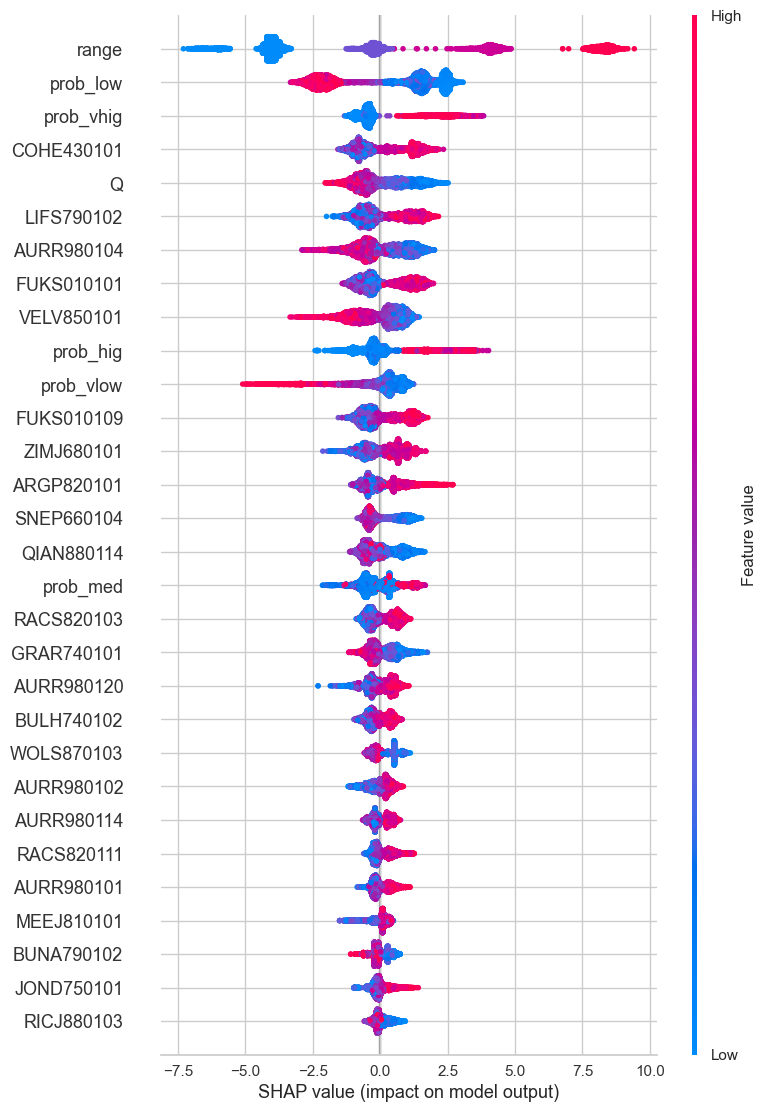

In [54]:
shap.summary_plot(shap_values, final_X, max_display = 30)

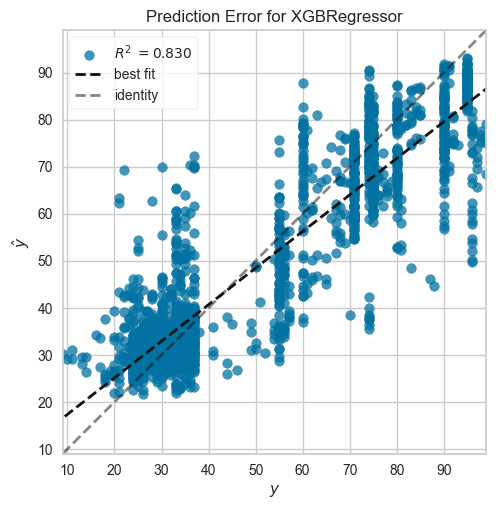

In [53]:
from yellowbrick.regressor import prediction_error
visualizer = prediction_error(model, final_X,final_Y, final_X_val,final_Y_val)

In [10]:
X_train

,A,C,D,E,F,G,H,I,K,L,...,YYM,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY
5771,0.060113,0.008167,0.039106,0.077373,0.052662,0.077836,0.026100,0.060576,0.062681,0.064786,...,0.0,0.000000,0.0,0.0,0.0,0.000465,0.000000,0.000000,0.0,0.000000
6417,0.055758,0.008074,0.066083,0.061728,0.040760,0.073765,0.016441,0.068750,0.054217,0.058107,...,0.0,0.000662,0.0,0.0,0.0,0.000662,0.000491,0.000662,0.0,0.000000
4189,0.082693,0.031763,0.062022,0.048359,0.037962,0.098508,0.012654,0.042894,0.046712,0.055233,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
7789,0.050425,0.000000,0.073519,0.115893,0.052211,0.058321,0.018992,0.081637,0.090725,0.080512,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3966,0.090509,0.020284,0.055346,0.060050,0.044637,0.083003,0.025721,0.085071,0.049208,0.061418,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.049501,0.003734,0.047541,0.093370,0.038807,0.080902,0.024627,0.080579,0.081596,0.092675,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
5191,0.086394,0.038838,0.066210,0.062862,0.044718,0.095297,0.013252,0.029802,0.032977,0.053264,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000051,0.000000,0.0,0.000051
5390,0.102675,0.015400,0.053625,0.072900,0.048025,0.076975,0.027125,0.047100,0.024775,0.111750,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
860,0.081081,0.006006,0.060060,0.081081,0.051051,0.069069,0.027027,0.069069,0.069069,0.066066,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000


In [13]:
train, test = scsplit(input_d, stratify = input_d["range"],test_size = 0.2,
                                             train_size = 0.8, random_state = 6)
    
X_train = train.drop(columns = ["seq_TEMP","range"], axis = 1)
y_train = train["range"]
    
X_validation = test.drop(columns = ["seq_TEMP","range"], axis = 1)
y_validation = test["range"]
    
    
X, y = X_train, y_train
y = LabelEncoder().fit_transform(y)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

data_model = pd.DataFrame(X)
data_model["range"] = y

data_val = pd.DataFrame(X_validation)
data_val["range"] = y_validation

data_model_f = data_model

data_xgb = data_model_f.drop(["range"], axis = 1)
data_xgb_y = data_model_f["range"] 

data_val_f = data_val.drop(["range"], axis = 1)
data_val_end = data_val["range"]

model2 = xgb.XGBClassifier(
                         num_parallel_tree = 10,
                         max_depth = 8,
                         learning_rate = 0.05,
                         verbosity = 1,
                         booster = 'gbtree',
                         tree_method = 'auto',
                         eval_metric= ['auc'],
                         n_jobs = -1,
                         subsample = 0.2,
                         sampling_method ='uniform',
                         colsample_bytree = 0.1,
                         objective ='multi:softprob',
                        )


In [14]:
model2.fit(data_xgb,data_xgb_y,eval_set=[(data_val_f,data_val_end)],early_stopping_rounds=10)

[0]	validation_0-auc:0.84999
[1]	validation_0-auc:0.86237
[2]	validation_0-auc:0.87194
[3]	validation_0-auc:0.87697
[4]	validation_0-auc:0.87761
[5]	validation_0-auc:0.87822
[6]	validation_0-auc:0.87878
[7]	validation_0-auc:0.87952
[8]	validation_0-auc:0.87986
[9]	validation_0-auc:0.88209
[10]	validation_0-auc:0.88188
[11]	validation_0-auc:0.88271
[12]	validation_0-auc:0.88353
[13]	validation_0-auc:0.88536
[14]	validation_0-auc:0.88563
[15]	validation_0-auc:0.88576
[16]	validation_0-auc:0.88606
[17]	validation_0-auc:0.88650
[18]	validation_0-auc:0.88712
[19]	validation_0-auc:0.88705
[20]	validation_0-auc:0.88764
[21]	validation_0-auc:0.88813
[22]	validation_0-auc:0.88828
[23]	validation_0-auc:0.88948
[24]	validation_0-auc:0.89019
[25]	validation_0-auc:0.89109
[26]	validation_0-auc:0.89152
[27]	validation_0-auc:0.89211
[28]	validation_0-auc:0.89224
[29]	validation_0-auc:0.89224
[30]	validation_0-auc:0.89235
[31]	validation_0-auc:0.89259
[32]	validation_0-auc:0.89311
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=['auc'], feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=10, objective='multi:softprob',
              predictor='auto', ...)

In [48]:
data = model2.get_booster().get_score(importance_type='gain')
new = pd.DataFrame.from_dict(data,orient ='index')
new["features"] = new.index
new.sort_values(by=0,ascending=False,inplace=True)
new.iloc[0:100,:]

,0,features
HKI,39.051376,HKI
TMV,38.676323,TMV
NGM,37.306347,NGM
ACE,30.426086,ACE
CRT,29.305893,CRT
...,...,...
CFG,11.438703,CFG
TKS,11.438702,TKS
DTG,11.422536,DTG
CII,11.410978,CII


0       0.003378
1       0.003906
2       0.006329
3       0.016000
4       0.005618
          ...   
8510    0.000137
8511    0.004258
8512    0.005627
8513    0.002387
8514    0.009414
Name: C, Length: 8515, dtype: float64

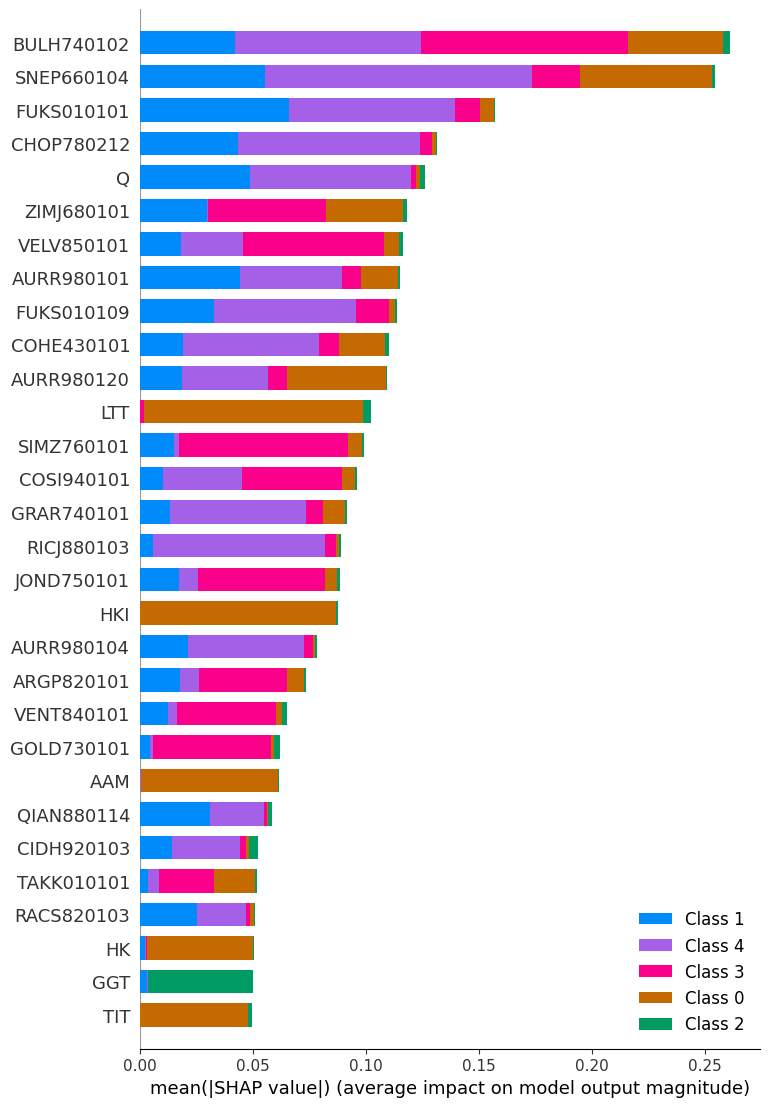

In [40]:
explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(data_xgb)
shap.summary_plot(shap_values, data_xgb, max_display = 30)

In [53]:
feature_importance

,col_name,feature_importance_vals
0,A,"[0.0078082727, 0.0063301907, 0.0017169025, 0.0..."
1,C,"[0.0058169602, 0.006396094, 0.0008316782, 0.00..."
2,D,"[0.006816036, 0.0061799977, 0.0010740214, 0.00..."
3,E,"[0.0063866014, 0.021336706, 0.00092801015, 0.0..."
4,F,"[0.008914976, 0.0065728696, 0.0009877286, 0.00..."
...,...,...
8510,WTT,"[0.008400379, 0.007067512, 0.0017362072, 0.006..."
8511,WTV,"[0.002739212, 0.0060242424, 0.000788243, 0.005..."
8512,WTW,"[0.0017959762, 0.009048186, 0.0010837567, 0.00..."
8513,WTY,"[0.007601342, 0.006280626, 0.00057243754, 0.00..."


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

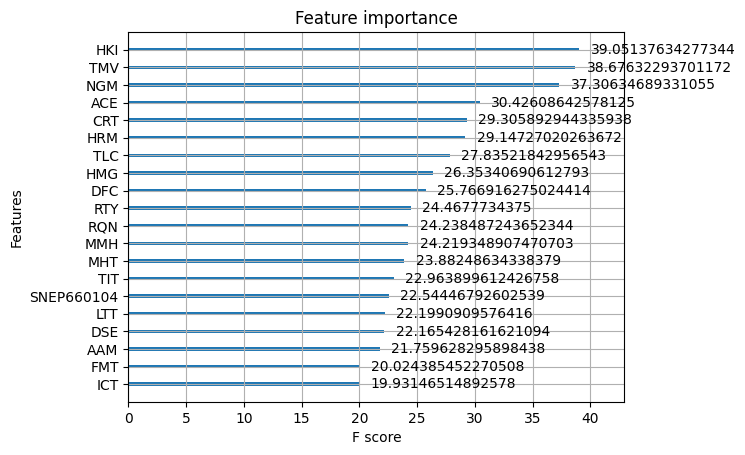

In [42]:
xgb.plot_importance(model2, max_num_features = 20, importance_type = "gain")

In [ ]:
input_d = input_d.drop("range",axis = 1)

In [164]:
input_d = Data_Full
data_2 = model2.get_booster().get_score(importance_type='gain')
new = pd.DataFrame.from_dict(data_2,orient ='index')
new["features"] = new.index
new.sort_values(by=0,ascending=False,inplace=True)
new = new.iloc[0:2000,:]
new_f  = new["features"].to_list()
input_d = input_d[new_f]
input_d

,HKI,TMV,NGM,ACE,CRT,HRM,TLC,HMG,DFC,RTY,...,CAE,GSN,ISR,GKG,GGR,DSG,DLF,NHI,SQG,QDC
0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.006024,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.003876,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.003012,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.002016,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2913,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.003135,0.0,0.000000,0.0
2914,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2915,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.001733,0.0,0.000000,0.0


In [165]:
from reg_resampler import resampler
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.over_sampling import SMOTE
from verstack.stratified_continuous_split import scsplit

In [166]:
input_d["seq_TEMP"] = data["seq_TEMP"]

In [167]:
r2_metric = []
from verstack.stratified_continuous_split import scsplit
from imblearn.over_sampling import SMOTE
for i in range(1):
    train, test = scsplit(input_d, stratify = input_d["seq_TEMP"],test_size = 0.2,
                                             train_size = 0.8, random_state = 6)
    
    X_train = train.drop(columns = ["seq_TEMP"], axis = 1)
    y_train = train["seq_TEMP"]
    X_test = test.drop(columns = ["seq_TEMP"], axis = 1)
    y_test = test["seq_TEMP"]
    
    rs = resampler()
    X_train["target"] = y_train
    Y_classes = rs.fit(X_train, target="target", bins= 100)
    Y =  y_train
    smote = SMOTE(random_state=27)
    final_X, final_Y = rs.resample(smote, X_train, Y_classes)
    X_train_R = X_train.drop(columns=["target"], axis = 1)

    #X_test["target"] = y_test
    #Y_classes = rs.fit(X_test, target="target", bins= 100)
    #Y =  y_test
    #smote = SMOTE(random_state=27)
    #final_X_t, final_Y_t = rs.resample(smote, X_test, Y_classes)
    #X_test_R = X_test.drop(columns=["target"], axis = 1)
    
    final_X_t, final_Y_t = X_test, y_test

    model = xgb.XGBRegressor(
                         num_parallel_tree = 100,
                         max_depth = 8,
                         n_estimators=5000,
                         learning_rate = 0.1,
                         verbosity = 1,
                         booster = 'gbtree',
                         tree_method = 'auto',
                         n_jobs = -1,
                         sampling_method ='uniform',
                         subsample = 0.3,
                         colsample_bytree = 0.2,
                         objective ='reg:squarederror',
                         gamma = 1,
                         reg_alpha = 1,
                         reg_lambda =1,
                         eval_metric = ["rmse"],
                         max_bin = 50,
                         min_child_weight = 10,
                         max_leaves =0,
                         grow_policy = 'lossguide'
                        )

    model.fit(final_X,final_Y,eval_set=[(final_X,final_Y),(final_X_t,final_Y_t)],early_stopping_rounds=10)

    r2_scr = r2_score(final_Y_t,model.predict(final_X_t)) 
    r2_metric.append(r2_scr)

INFO: Class 0 has been merged into Class 71 due to low number of samples
INFO: Class 1 has been merged into Class 71 due to low number of samples
INFO: Class 2 has been merged into Class 71 due to low number of samples
INFO: Class 3 has been merged into Class 71 due to low number of samples
INFO: Class 4 has been merged into Class 71 due to low number of samples
INFO: Class 5 has been merged into Class 71 due to low number of samples
INFO: Class 6 has been merged into Class 71 due to low number of samples
INFO: Class 7 has been merged into Class 71 due to low number of samples
INFO: Class 26 has been merged into Class 25 due to low number of samples
INFO: Class 27 has been merged into Class 25 due to low number of samples
INFO: Class 30 has been merged into Class 29 due to low number of samples
INFO: Class 33 has been merged into Class 32 due to low number of samples
INFO: Class 34 has been merged into Class 32 due to low number of samples
INFO: Class 35 has been merged into Class 32 d

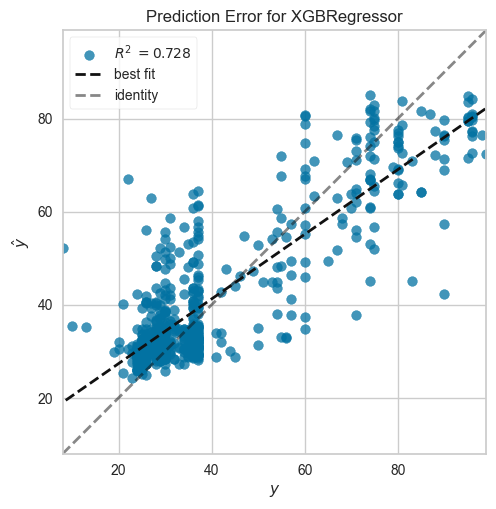

In [168]:
from yellowbrick.regressor import prediction_error
visualizer = prediction_error(model, final_X,final_Y,final_X_t,final_Y_t)

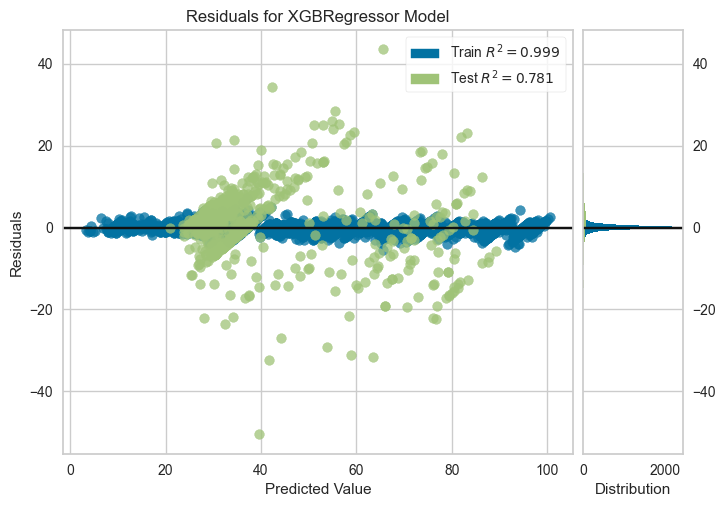

<AxesSubplot: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [131]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model)
visualizer.fit(final_X,final_Y)  # Fit the training data to the visualizer
visualizer.score(final_X_t,final_Y_t)  # Evaluate the model on the test data
visualizer.show()    